In [190]:
# module
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [191]:
# Read train data
train = pd.read_csv('./../train.csv', parse_dates=['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [192]:
# Read test data
test = pd.read_csv('./../test.csv', parse_dates=['datetime'])

In [193]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [194]:
# Set train feature
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train['dayofweek'] = train['datetime'].dt.dayofweek
print(train.shape)
print(train.info())

(10886, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 19 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
year          10886 non-null int64
month         10886 non-null int64
day           10886 non-null int64
hour          10886 non-null int64
minute        10886 non-null int64
second        10886 non-null int64
dayofweek     10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(15)
memory usage: 1.6 MB
None


In [195]:
# Set test feature
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['minute'] = test['datetime'].dt.minute
test['second'] = test['datetime'].dt.second
test['dayofweek'] = test['datetime'].dt.dayofweek
print(test.shape)
print(test.info())

(6493, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 16 columns):
datetime      6493 non-null datetime64[ns]
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
year          6493 non-null int64
month         6493 non-null int64
day           6493 non-null int64
hour          6493 non-null int64
minute        6493 non-null int64
second        6493 non-null int64
dayofweek     6493 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(12)
memory usage: 811.7 KB
None


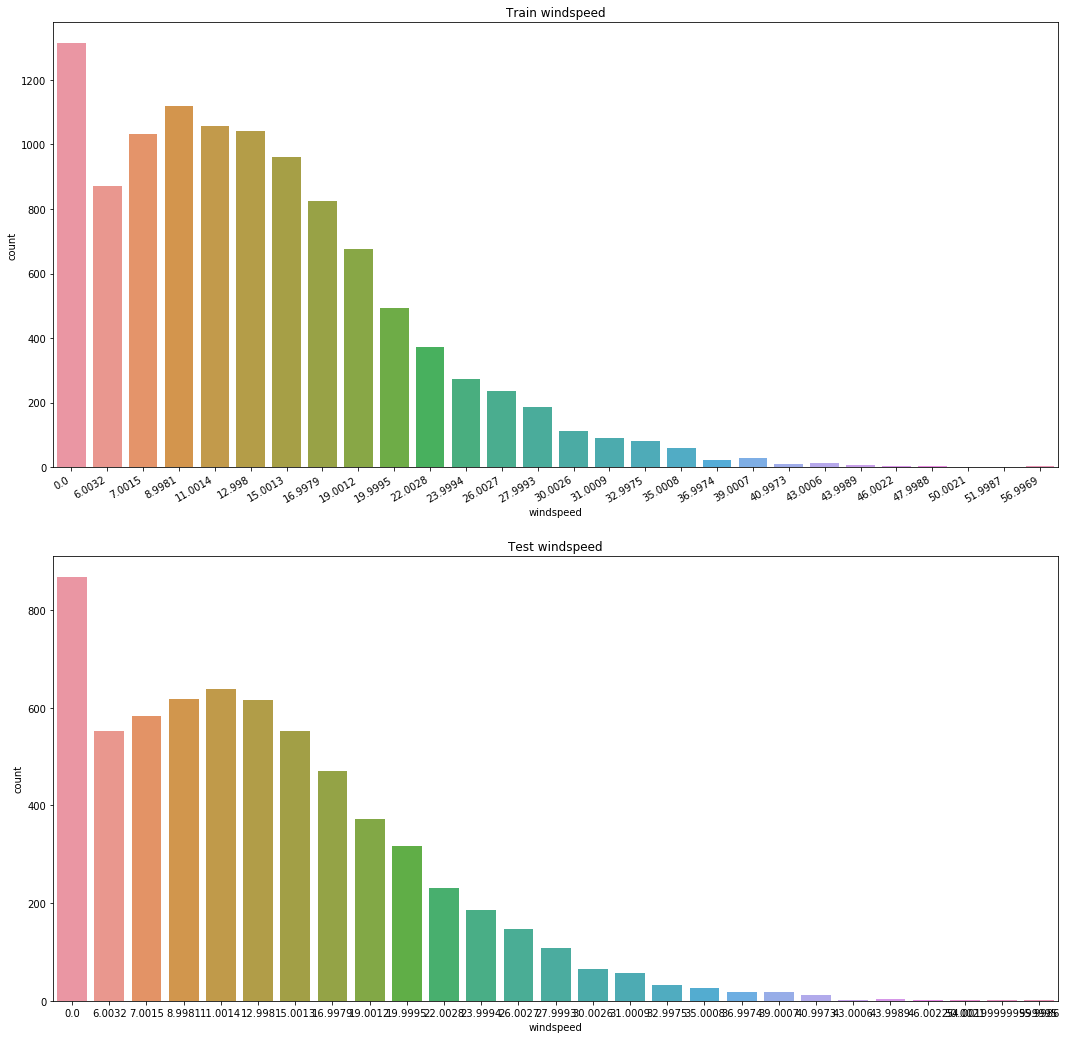

In [196]:
# Windspeed shows a lot of 0 values.
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(18,18)

# Check train, test dataset
plt.sca(axes[0])
plt.xticks(rotation=30, ha = 'right')
axes[0].set(ylabel='Count', title='Train windspeed')
sns.countplot(data=train, x='windspeed',ax=axes[0])

axes[1].set(ylabel='Count', title='Test windspeed')
sns.countplot(data=test, x='windspeed',ax=axes[1])

In [197]:
# check if windspeed is the real problem
# Check whether windspeed is 0 or not

trainWind0 = train[train['windspeed'] == 0]
trainWindN0 = train[train['windspeed'] != 0]
print(trainWind0.shape)
print('---------------------------------')
print(trainWindN0.shape)
print('---------------------------------')
print(trainWind0.windspeed.count() / train.windspeed.count() * 100, '%')

print('=========================================')

testWind0 = test[test['windspeed'] == 0]
testWindN0 = test[test['windspeed'] != 0]
print(testWind0.shape)
print('---------------------------------')
print(testWindN0.shape)
print('---------------------------------')
print(testWind0.windspeed.count() / test.windspeed.count() * 100, '%')
    # If it exceeds 10%, it cannot be erased.

(1313, 19)
---------------------------------
(9573, 19)
---------------------------------
12.061363218813154 %
(867, 16)
---------------------------------
(5626, 16)
---------------------------------
13.35284152163869 %


Substituting zero windspeed for mean and median doesn't help.
Using the RandomForest Classification Model.

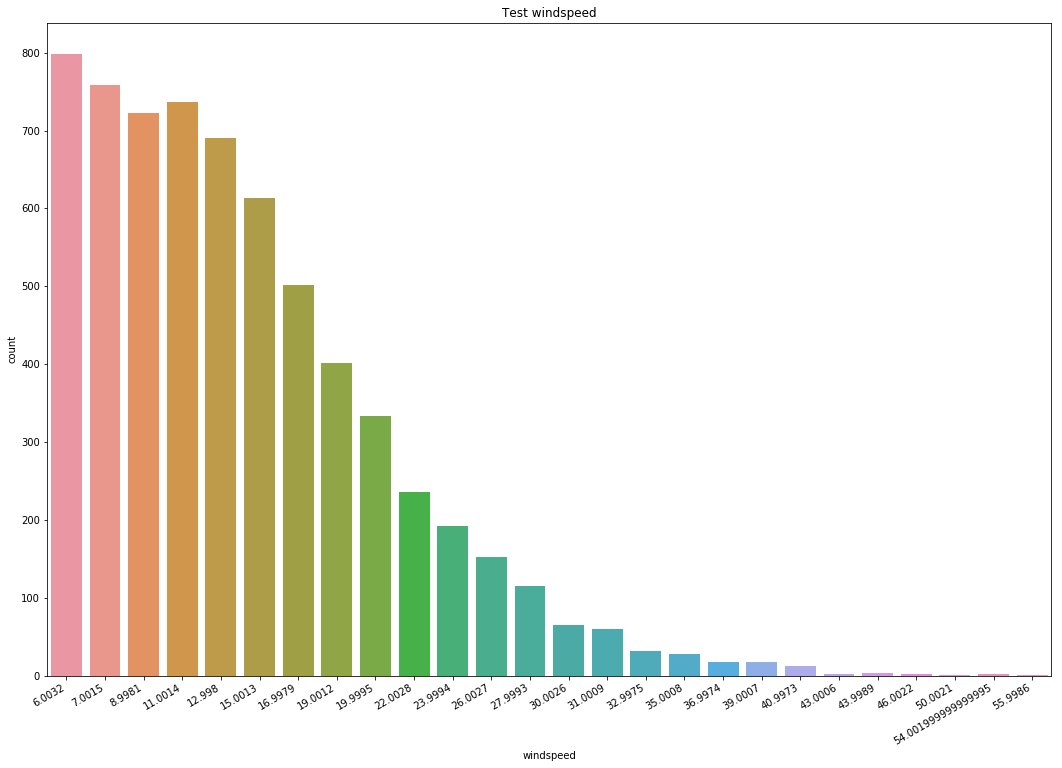

In [198]:
# Replace the 0 windspeed in the test dataset with RandomForestClassifier
test = predict_windspeed(test)

fig, ax1 = plt.subplots()
fig.set_size_inches(18,12)

# Check test dataset
plt.sca(ax1)
plt.xticks(rotation=30, ha = 'right') # ha 는 기준
ax1.set(ylabel='Count', title='Test windspeed')
sns.countplot(data=test, x='windspeed',ax=ax1)


# Feature Selection
- Distinguish between signal and noise
- Having a lot of features does not necessarily imply good performance.
- Add or remove features one by one and remove features with poor performance.


In [199]:
# Distinguish between continuous and categorical features
# Continuous Feature : temp, humidity, windspeed, atemp
# Categorical Feature : season, holiday, workingday, weather, dayofweek, month, year, hour
# Change categorical feature to category
categorical_feature_name = ['season','holiday','workingday','weather','dayofweek','month','year','hour']

for i in categorical_feature_name:
    train[i] = train[i].astype('category')

In [200]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 19 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null category
holiday       10886 non-null category
workingday    10886 non-null category
weather       10886 non-null category
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
year          10886 non-null category
month         10886 non-null category
day           10886 non-null int64
hour          10886 non-null category
minute        10886 non-null int64
second        10886 non-null int64
dayofweek     10886 non-null category
dtypes: category(8), datetime64[ns](1), float64(3), int64(7)
memory usage: 1022.9 KB


In [201]:
# Configure required features
feature_name = ['season','weather','temp','atemp','humidity','windspeed','year','hour','dayofweek','holiday','workingday']

In [202]:
X_train = train[feature_name]
print(X_train.shape)
X_train.head()

(10886, 11)


,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,holiday,workingday
0,1,1,9.84,14.395,81,0.0,2011,0,5,0,0
1,1,1,9.02,13.635,80,0.0,2011,1,5,0,0
2,1,1,9.02,13.635,80,0.0,2011,2,5,0,0
3,1,1,9.84,14.395,75,0.0,2011,3,5,0,0
4,1,1,9.84,14.395,75,0.0,2011,4,5,0,0


In [203]:
X_test = test[feature_name]
print(X_test.shape)
X_test.head()

(6493, 11)


,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,holiday,workingday
0,1,1,10.66,11.365,56,26.0027,2011,0,3,0,1
1,1,1,10.66,12.880,56,11.0014,2011,3,3,0,1
2,1,1,10.66,12.880,56,11.0014,2011,4,3,0,1
3,1,1,9.84,11.365,60,15.0013,2011,5,3,0,1
4,1,1,9.02,10.605,60,15.0013,2011,6,3,0,1


In [204]:
Y_train = np.log(train['count'])
print(Y_train.shape)
Y_train.head()
    # classified answers

(10886,)


0    2.772589
1    3.688879
2    3.465736
3    2.564949
4    0.000000
Name: count, dtype: float64

# RMSLE(Root Mean Squared Logarithmic Error)
- It is the square of the average of the squared errors. The smaller the value, the higher the precision. 
- The closer the value is to 0, the higher the precision.

In [205]:
from sklearn.metrics import make_scorer
def rmsle(predicted_values, actual_values):
    # # Convert to array with numpy
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # Add 1 to the predicted value and the actual value and log it.
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    # Subtract and square the actual value from the predicted value calculated above.
    difference = log_predict - log_actual
    difference = np.square(difference)
    
    # Find the average.
    mean_difference = difference.mean()
    
    # Put the root on it.
    score = np.sqrt(mean_difference)
    return score

rmsle_score = make_scorer(rmsle)
rmsle_score

make_scorer(rmsle)


# Cross-validation
Cross-validation by changing the range of training data and test data.


In [206]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits = 10, shuffle=True, random_state=0) # n_splits: mix it 10 times. random_state : fix value


# RandomForest regressor


In [207]:
# n_estimator / n_jobs = -1 do it until you know the answer
model = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=0) 
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [208]:
%time score = cross_val_score(model, X_train, Y_train,cv=k_fold, scoring=rmsle_score)

score = score.mean()
print('Score = ',score)

Wall time: 12.4 s
Score =  0.11427121175296862


In [209]:
# Training
model.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [210]:
# Prediction
pre = model.predict(X_test)
print(pre.shape)
pre[0:10]

(6493,)


array([2.38991495, 1.22317335, 1.02512852, 1.77170646, 3.64595598,
       4.6790266 , 5.47996166, 4.91939323, 4.1241072 , 4.12530902])

[Text(0.5, 1.0, 'Test')]

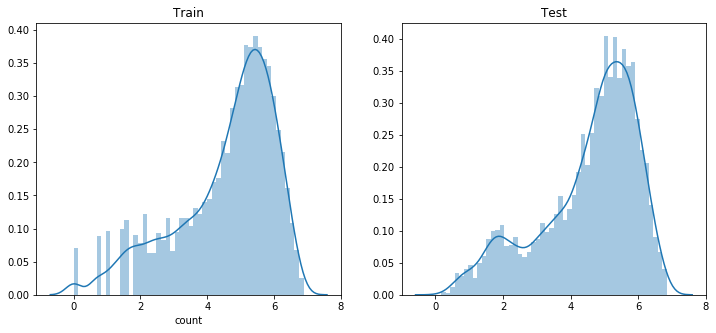

In [211]:
# Visualize predicted data
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(Y_train, ax=ax1, bins=50)
ax1.set(title='Train')
sns.distplot(pre, ax=ax2, bins=50)
ax2.set(title='Test')
    # It's okay because the train data and test data look similar


# Submission


In [212]:
submission = pd.read_csv('./../sampleSubmission.csv')
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [213]:
submission['count'] = pre
submission.head()

,datetime,count
0,2011-01-20 00:00:00,2.389915
1,2011-01-20 01:00:00,1.223173
2,2011-01-20 02:00:00,1.025129
3,2011-01-20 03:00:00,1.771706
4,2011-01-20 04:00:00,3.645956


In [214]:
submission.to_csv('./score-1.csv', index=False)